/Users/gabrielsabella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


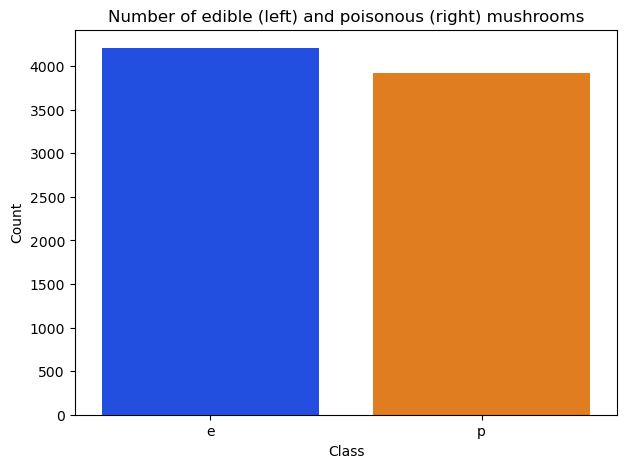

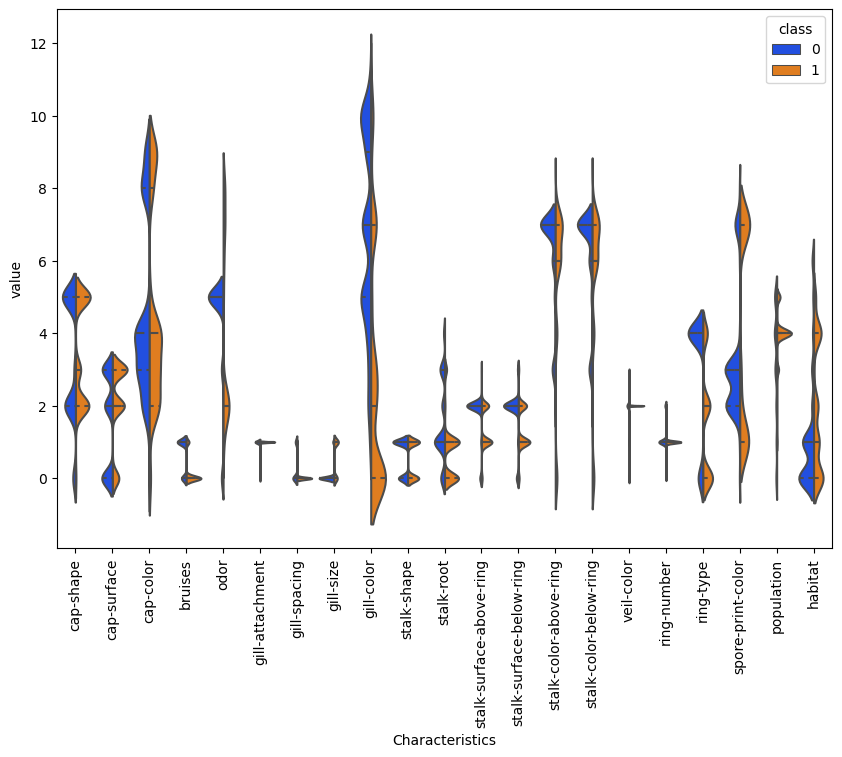

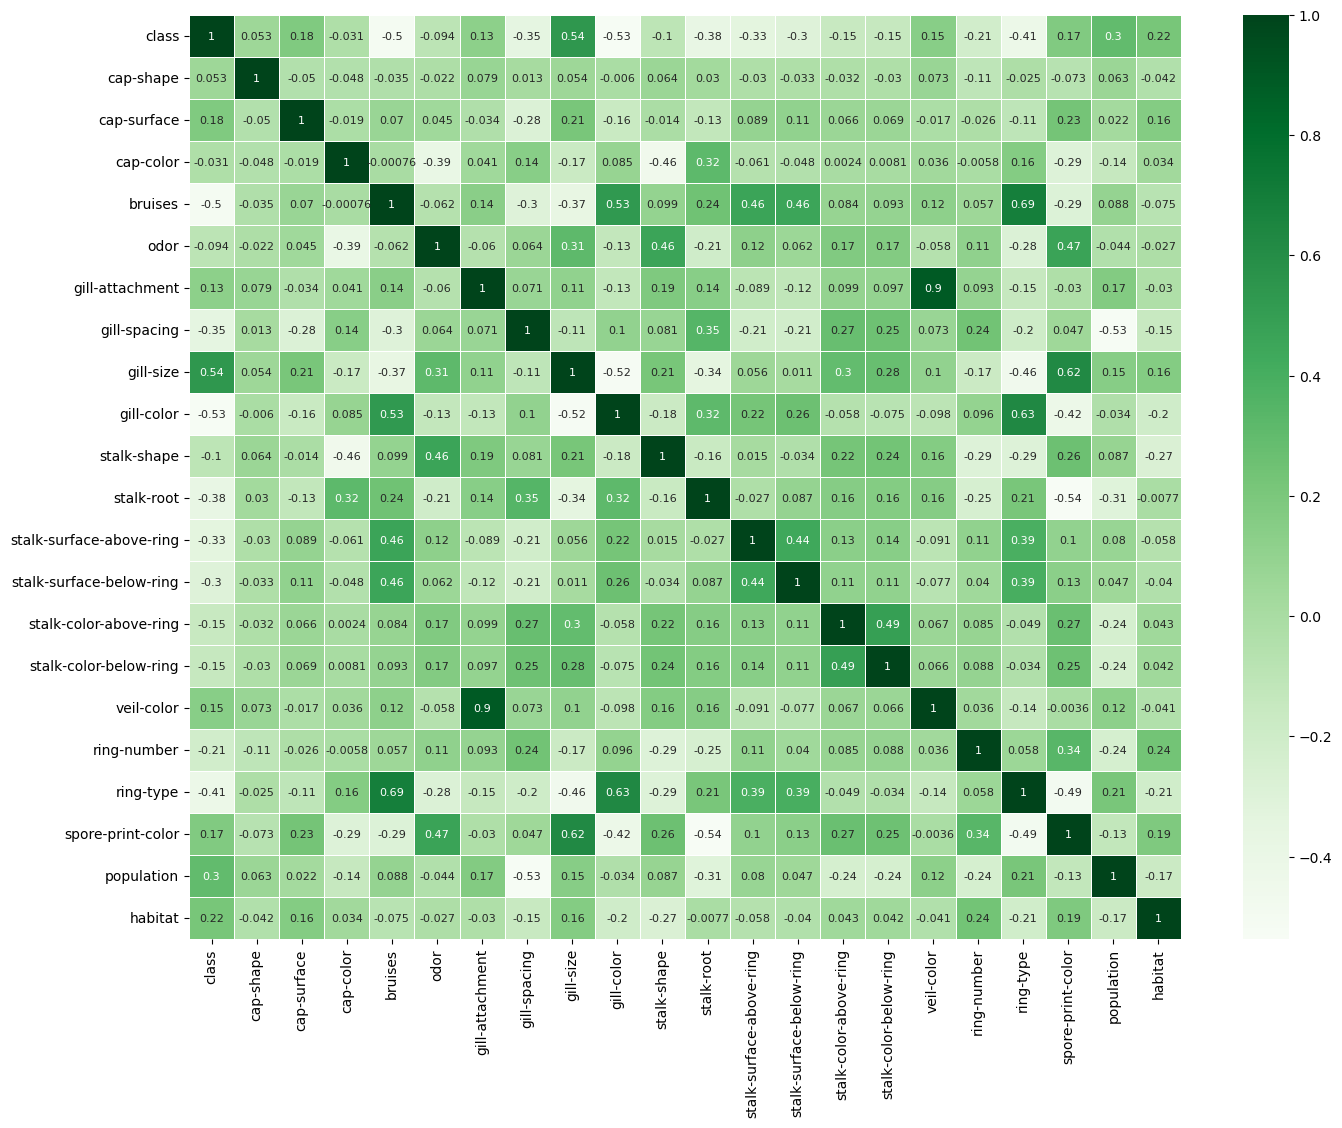

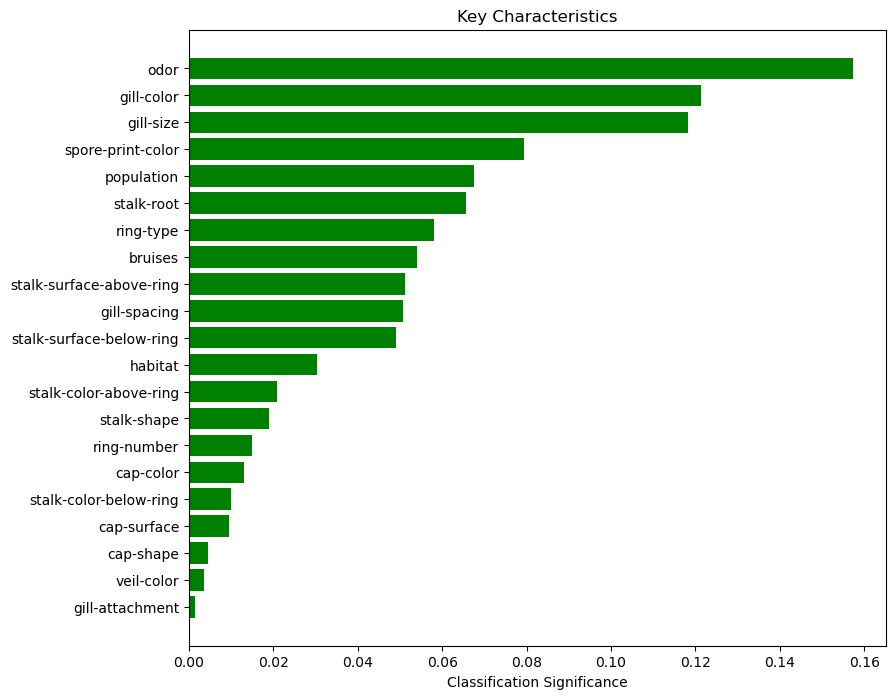

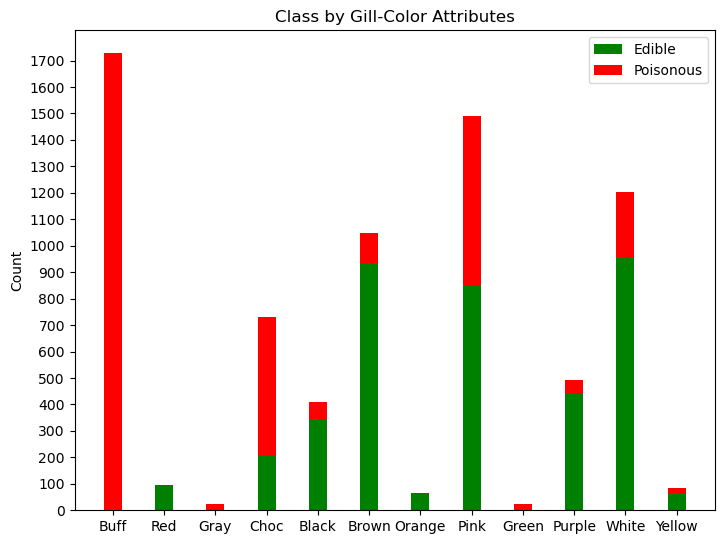

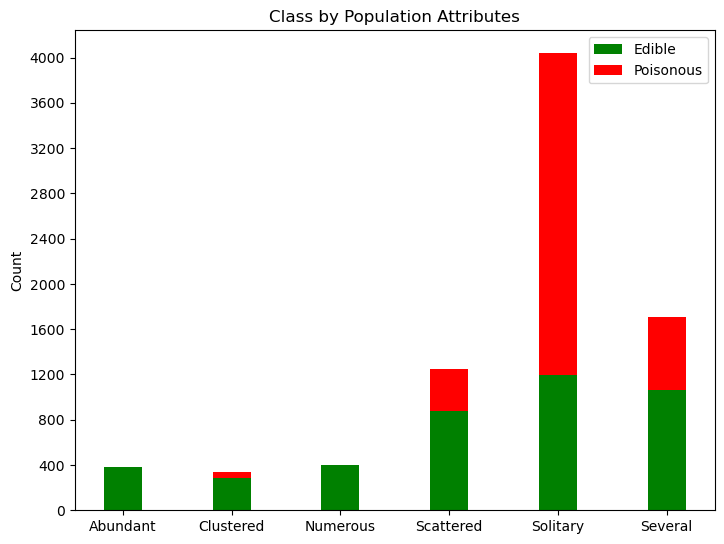

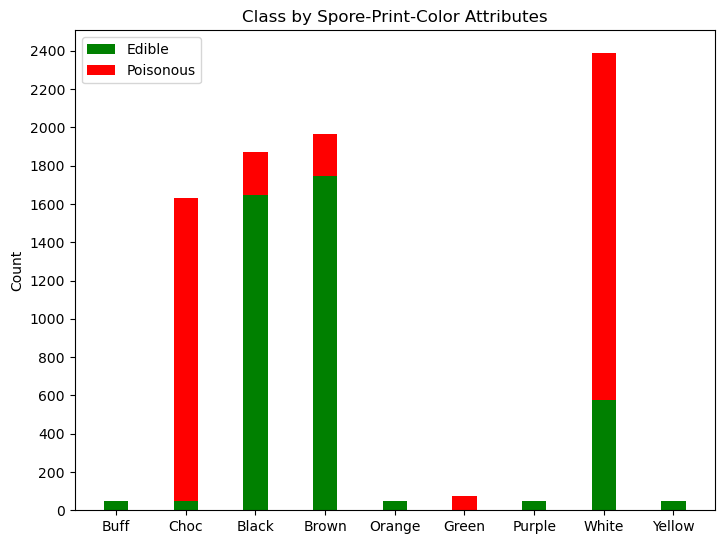

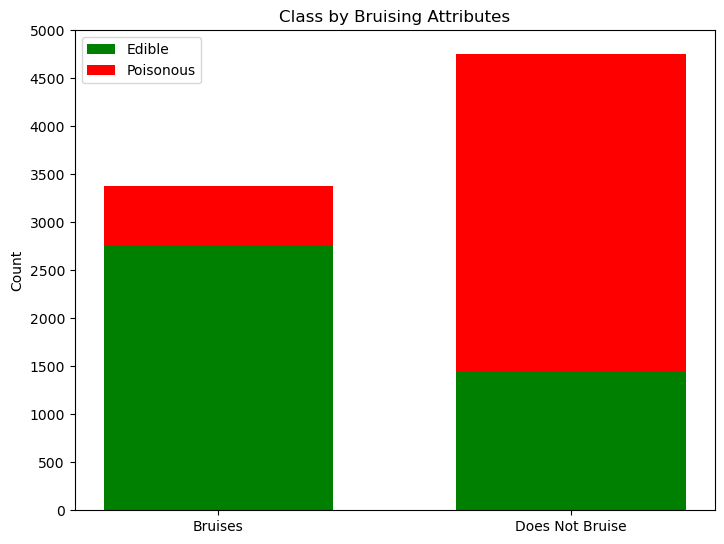

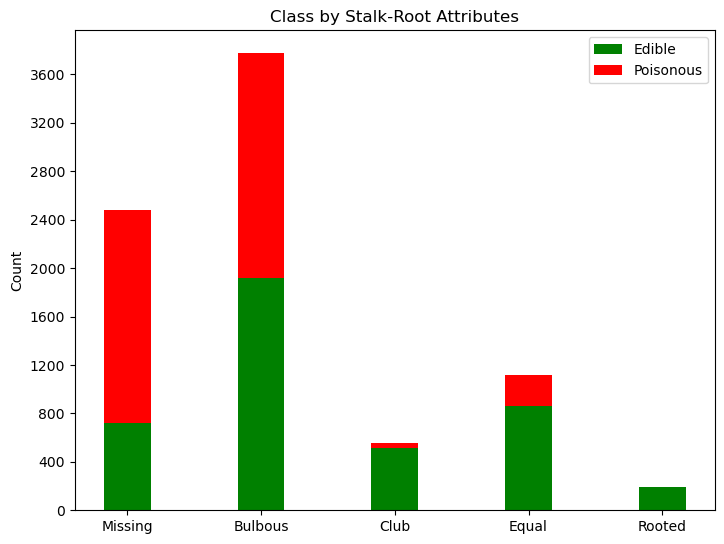

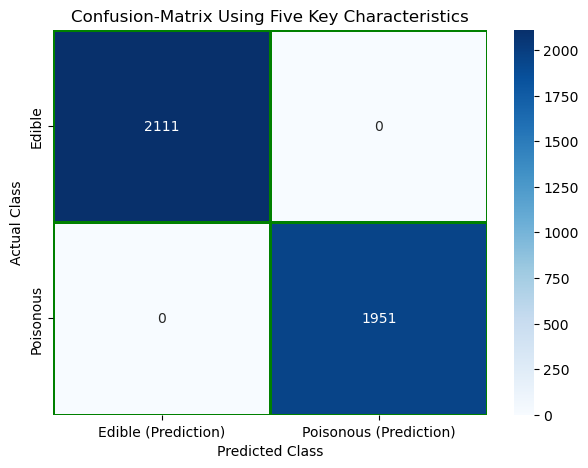

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2111
           1       1.00      1.00      1.00      1951

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('static/mushrooms.csv')# 22data frame object 
# Removing veil-type because there's only one option
df = df.drop(["veil-type"],axis=1)

# Classification report for prediction 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# BAR GRAPH count of edible/poisonous 
count = df['class'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(count.index, count.values, palette="bright")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of edible (left) and poisonous (right) mushrooms')

# Converting the data to ordinal 
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])    
    
# VIOLIN PLOT 
# Stack columns --> 8124 x 22 becomes 170604 x 3 columns (class, attribute, value)
df_div = pd.melt(df, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(10,7))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=df_div, inner = 'quartile', palette = 'bright')
df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

# HEAT MAP
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, linewidths=.5,cmap="Greens")
# plt.savefig("fig3.png", format='png', dpi=500, bbox_inches='tight')
df_div = pd.melt(
    df, 'class', var_name='Characteristics')
X = df.drop(['class'], axis=1)
Y = df["class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=45, test_size=0.5)

# Machine Learning Method 
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

# CLASSIFICATION SIGNIFICANCE BAR GRAPH
features_list = X.columns.values
FI = RFC.feature_importances_
sorted_idx = np.argsort(FI) 
plt.figure(figsize=(9,8))
plt.barh(range(len(sorted_idx)), FI[sorted_idx], color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Classification Significance')
plt.title('Key Characteristics')
# plt.draw()
# plt.show()


# GILL COLOR BAR PLOT
N = 12
df = pd.read_csv("static/mushrooms.csv") # Initiating data frame 
kc = df[['class', 'gill-color']]
# Buff
BP = len(kc.loc[(kc['gill-color'] == 'b') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['gill-color'] == 'b') & (kc['class'] == 'e')])
# Red
EP = len(kc.loc[(kc['gill-color'] == 'e') & (kc['class'] == 'p')])
EE = len(kc.loc[(kc['gill-color'] == 'e') & (kc['class'] == 'e')])
# Gray
GP = len(kc.loc[(kc['gill-color'] == 'g') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['gill-color'] == 'g') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['gill-color'] == 'h') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['gill-color'] == 'h') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['gill-color'] == 'k') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['gill-color'] == 'k') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['gill-color'] == 'n') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['gill-color'] == 'n') & (kc['class'] == 'e')])
# Orange
OP = len(kc.loc[(kc['gill-color'] == 'o') & (kc['class'] == 'p')])
OE = len(kc.loc[(kc['gill-color'] == 'o') & (kc['class'] == 'e')])
# Pink
PP = len(kc.loc[(kc['gill-color'] == 'p') & (kc['class'] == 'p')])
PE = len(kc.loc[(kc['gill-color'] == 'p') & (kc['class'] == 'e')])
# Green
GP = len(kc.loc[(kc['gill-color'] == 'r') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['gill-color'] == 'r') & (kc['class'] == 'e')])
# Purple
UP = len(kc.loc[(kc['gill-color'] == 'u') & (kc['class'] == 'p')])
UE = len(kc.loc[(kc['gill-color'] == 'u') & (kc['class'] == 'e')])
# White
WP = len(kc.loc[(kc['gill-color'] == 'w') & (kc['class'] == 'p')])
WE = len(kc.loc[(kc['gill-color'] == 'w') & (kc['class'] == 'e')])
# Yellow
YP = len(kc.loc[(kc['gill-color'] == 'y') & (kc['class'] == 'p')])
YE = len(kc.loc[(kc['gill-color'] == 'y') & (kc['class'] == 'e')])
edible = (BE, EE, GE, HE, KE, NE, OE, PE, GE, UE, WE, YE)
poisonous = (BP, EP, GP, HP, KP, NP, OP, PP, GP, UP, WP, YP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, edible, width, color='g')
ax.bar(ind, poisonous, width,bottom=edible, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Gill-Color Attributes')
ax.set_xticks(ind, ('Buff', 'Red', 'Gray', 'Choc', 'Black', 'Brown', 'Orange', 'Pink', 'Green', 'Purple', 'White', 'Yellow'))
ax.set_yticks(np.arange(0, 1800, 100))
ax.legend(labels=['Edible', 'Poisonous'])
plt.show()

# POPULATION BAR PLOT 
N = 6
kc = df[['class', 'population']]
# Buff
BP = len(kc.loc[(kc['population'] == 'a') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['population'] == 'a') & (kc['class'] == 'e')])
# Red
EP = len(kc.loc[(kc['population'] == 'c') & (kc['class'] == 'p')])
EE = len(kc.loc[(kc['population'] == 'c') & (kc['class'] == 'e')])
# Gray
GP = len(kc.loc[(kc['population'] == 'n') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['population'] == 'n') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['population'] == 's') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['population'] == 's') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['population'] == 'v') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['population'] == 'v') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['population'] == 'y') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['population'] == 'y') & (kc['class'] == 'e')])
edible = (BE, EE, GE, HE, KE, NE)
poisonous = (BP, EP, GP, HP, KP, NP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, edible, width, color='g')
ax.bar(ind, poisonous, width,bottom=edible, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Population Attributes')
ax.set_xticks(ind, ('Abundant', 'Clustered', 'Numerous', 'Scattered', 'Solitary', 'Several'))
ax.set_yticks(np.arange(0, 4200, 400))
ax.legend(labels=['Edible', 'Poisonous'])
plt.show()

# SPORE PRINT COLOR BAR PLOT 
N = 9
kc = df[['class', 'spore-print-color']]
# Buff
BP = len(kc.loc[(kc['spore-print-color'] == 'b') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['spore-print-color'] == 'b') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['spore-print-color'] == 'h') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['spore-print-color'] == 'h') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['spore-print-color'] == 'k') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['spore-print-color'] == 'k') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['spore-print-color'] == 'n') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['spore-print-color'] == 'n') & (kc['class'] == 'e')])
# Orange
OP = len(kc.loc[(kc['spore-print-color'] == 'o') & (kc['class'] == 'p')])
OE = len(kc.loc[(kc['spore-print-color'] == 'o') & (kc['class'] == 'e')])
# Green
GP = len(kc.loc[(kc['spore-print-color'] == 'r') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['spore-print-color'] == 'r') & (kc['class'] == 'e')])
# Purple
UP = len(kc.loc[(kc['spore-print-color'] == 'u') & (kc['class'] == 'p')])
UE = len(kc.loc[(kc['spore-print-color'] == 'u') & (kc['class'] == 'e')])
# White
WP = len(kc.loc[(kc['spore-print-color'] == 'w') & (kc['class'] == 'p')])
WE = len(kc.loc[(kc['spore-print-color'] == 'w') & (kc['class'] == 'e')])
# Yellow
YP = len(kc.loc[(kc['spore-print-color'] == 'y') & (kc['class'] == 'p')])
YE = len(kc.loc[(kc['spore-print-color'] == 'y') & (kc['class'] == 'e')])
edible = (BE, HE, KE, NE, OE, GE, UE, WE, YE)
poisonous = (BP, HP, KP, NP, OP, GP, UP, WP, YP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, edible, width, color='g')
ax.bar(ind, poisonous, width,bottom=edible, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Spore-Print-Color Attributes')
ax.set_xticks(ind, ('Buff', 'Choc', 'Black', 'Brown', 'Orange', 'Green', 'Purple', 'White', 'Yellow'))
ax.set_yticks(np.arange(0, 2500, 200))
ax.legend(labels=['Edible', 'Poisonous'])
plt.show()

# BRUISES BAR PLOT
N = 2
kc = df[['class', 'bruises']]
BP = len(kc.loc[(kc['bruises'] == 't') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['bruises'] == 't') & (kc['class'] == 'e')])
EP = len(kc.loc[(kc['bruises'] == 'f') & (kc['class'] == 'p')])
EE = len(kc.loc[(kc['bruises'] == 'f') & (kc['class'] == 'e')])
edible = (BE, EE)
poisonous = (BP, EP)
ind = np.arange(N)
width = 0.65
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, edible, width, color='g')
ax.bar(ind, poisonous, width,bottom=edible, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Bruising Attributes')
ax.set_xticks(ind, ('Bruises', 'Does Not Bruise'))
ax.set_yticks(np.arange(0, 5100, 500))
ax.legend(labels=['Edible', 'Poisonous'])
plt.show()

# STALK ROOT BAR PLOT 
N = 5
kc = df[['class', 'stalk-root']]
BP = len(kc.loc[(kc['stalk-root'] == '?') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['stalk-root'] == '?') & (kc['class'] == 'e')])
HP = len(kc.loc[(kc['stalk-root'] == 'b') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['stalk-root'] == 'b') & (kc['class'] == 'e')])
KP = len(kc.loc[(kc['stalk-root'] == 'c') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['stalk-root'] == 'c') & (kc['class'] == 'e')])
NP = len(kc.loc[(kc['stalk-root'] == 'e') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['stalk-root'] == 'e') & (kc['class'] == 'e')])
OP = len(kc.loc[(kc['stalk-root'] == 'r') & (kc['class'] == 'p')])
OE = len(kc.loc[(kc['stalk-root'] == 'r') & (kc['class'] == 'e')])
GP = len(kc.loc[(kc['stalk-root'] == 'u') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['stalk-root'] == 'u') & (kc['class'] == 'e')])
edible = (BE, HE, KE, NE, OE)
poisonous = (BP, HP, KP, NP, OP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, edible, width, color='g')
ax.bar(ind, poisonous, width,bottom=edible, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Stalk-Root Attributes')
ax.set_xticks(ind, ('Missing', 'Bulbous', 'Club', 'Equal', 'Rooted'))
ax.set_yticks(np.arange(0, 4000, 400))
ax.legend(labels=['Edible', 'Poisonous'])

# ACCURACY VALIDATION 

# CONFUSION MATRIX
preds = RFC.predict(X_test)  # Predictions
cm = confusion_matrix(Y_test, preds)
x_axis_labels = ["Edible (Prediction)", "Poisonous (Prediction)"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=1, linecolor="Green", fmt = ".0f",cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion-Matrix Using Five Key Characteristics');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

predictions = RFC.predict(X_test)
cr = classification_report(Y_test, predictions)
print(cr)



 

